## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_iris

## Overview

In [2]:
iris = load_iris()

In [3]:
print(iris.data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


### np array to df

In [4]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [5]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
84,5.4,3.0,4.5,1.5
97,6.2,2.9,4.3,1.3
95,5.7,3.0,4.2,1.2
25,5.0,3.0,1.6,0.2
96,5.7,2.9,4.2,1.3


In [7]:
iris_df.shape

(150, 4)

In [8]:
iris_df.isnull().sum().sum()

0

In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Basic Statistics

In [10]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### number of feature

In [11]:
iris.data.shape[1]

4

### number of sample 

In [12]:
iris.data.shape[0]

150

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

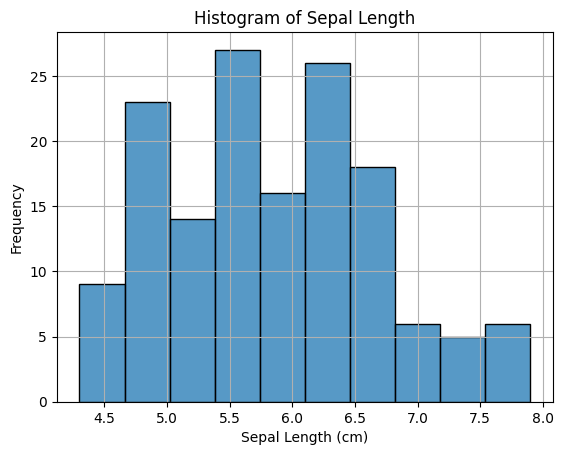

In [14]:
sns.histplot(data=iris_df['sepal length (cm)'], bins=10, kde=False)
plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

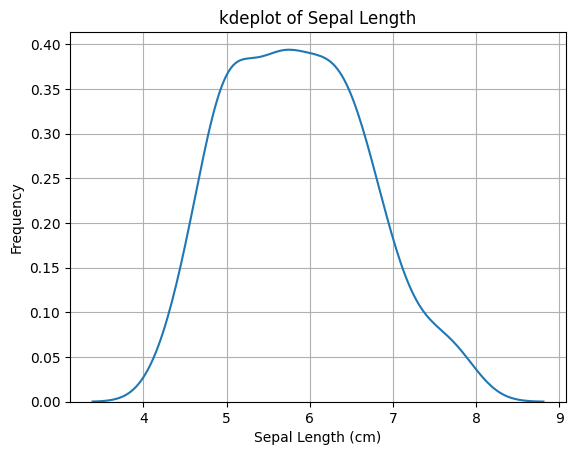

In [15]:
sns.kdeplot(data=iris_df['sepal length (cm)'])
plt.title('kdeplot of Sepal Length')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

data is normal distributed, we can apply linear regression.

### train test split

In [16]:
from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

Training set size: (112, 4), Testing set size: (38, 4)


In [17]:
X_train.shape

(112, 4)

In [18]:
X_test.shape

(38, 4)

## LabelEncoding

In [19]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


## Model Evaluation

In [21]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
y_pred = model.predict(X_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 1.0


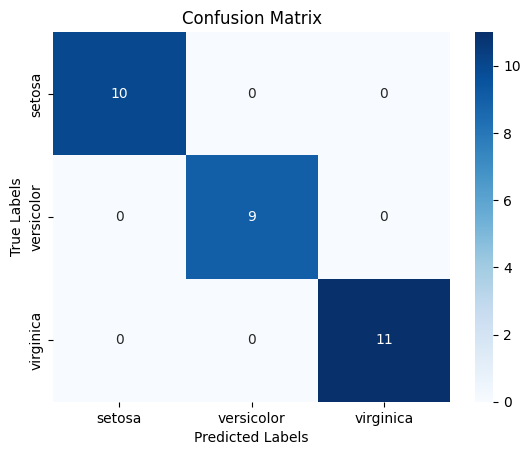

In [24]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()